In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
from matplotlib import rc
from datetime import datetime
from IPython.display import clear_output
#%matplotlib nbagg
%matplotlib inline

In [2]:
d = pd.read_csv("Hamish2.txt",delimiter='\t',header=None)
channel = np.array(d[0])
edge = np.array(d[1])
time = np.array(d[2])

# Data Overview

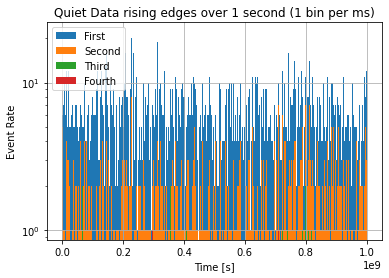

In [5]:
bns = 1*1000 # 1 second times 1000 ms to bin every ms
cn1=1
cn2=2
cn3=3
cn4=4
endTime=1e9 #1 second

pp.close()
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn1,edge==0),time<=endTime))],bins=bns,label="First", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn2,edge==0),time<=endTime))],bins=bns,label="Second", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn3,edge==0),time<=endTime))],bins=bns,label="Third", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn4,edge==0),time<=endTime))],bins=bns,label="Fourth", histtype="barstacked")
#pp.hist(time[channel==0],bins=bns,label="live time",histtype="step")
pp.yscale("log")
pp.legend(loc="upper left")
pp.xlabel("Time [s]")
pp.ylabel("Event Rate")
pp.title("Quiet Data rising edges over 1 second (1 bin per ms)")
pp.grid()
pp.show()

In [ ]:
pp.close()
bns = 6000
cn1=1
cn2=2
cn3=3
cn4=4
endTime=60*1e9 #1 min

pp.close()
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn2,edge==0),time<=endTime))],bins=bns,label="Second", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn3,edge==0),time<=endTime))],bins=bns,label="Third", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn4,edge==0),time<=endTime))],bins=bns,label="Fourth", histtype="barstacked")
#pp.hist(time[channel==0],bins=bns,label="live time",histtype="step")
pp.yscale("log")
pp.legend(loc="upper left")
pp.xlabel("Time [s]")
pp.ylabel("Event Rate")
pp.title("Quiet Data rising edges over 1 minute (1 bin per 2 ms)")
pp.grid()
pp.show()

In [ ]:
bns = 200 # 1 second times 1000 ms to bin every ms
cn1=1
cn2=2
cn3=3
cn4=4
endTime=1e9 #1 second

pp.close()
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn1,edge==0),time<=endTime))],bins=bns,label="First", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn2,edge==0),time<=endTime))],bins=bns,label="Second", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn3,edge==0),time<=endTime))],bins=bns,label="Third", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn4,edge==0),time<=endTime))],bins=bns,label="Fourth", histtype="barstacked")
#pp.hist(time[channel==0],bins=bns,label="live time",histtype="step")
pp.yscale("log")
pp.legend(loc="upper left")
pp.xlabel("Time [s]")
pp.ylabel("Event Rate")
pp.title("Quiet Data rising edges over 1 second (200 bins)")
pp.grid()
pp.show()

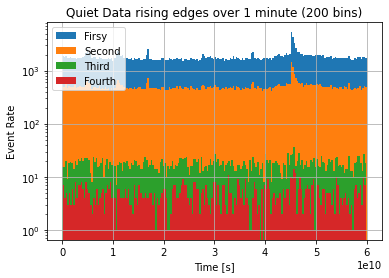

In [5]:
pp.close()
bns = 200
cn1=1
cn2=2
cn3=3
cn4=4
endTime=60*1e9 #1 min
#60463699912.9

pp.close()
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn1,edge==0),time<=endTime))],bins=bns,label="Firsy", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn2,edge==0),time<=endTime))],bins=bns,label="Second", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn3,edge==0),time<=endTime))],bins=bns,label="Third", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn4,edge==0),time<=endTime))],bins=bns,label="Fourth", histtype="barstacked")
#pp.hist(time[channel==0],bins=bns,label="live time",histtype="step")
pp.yscale("log")
pp.legend(loc="upper left")
pp.xlabel("Time [s]")
pp.ylabel("Event Rate")
pp.title("Quiet Data rising edges over 1 minute (200 bins)")
pp.grid()
pp.show()

## Start Cutting 'n' hits per bin

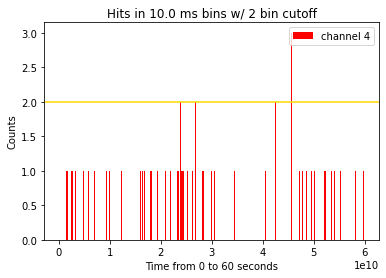

# bins
6000
# bins with low occurances
886
# bins with more occurances
5114
# empty bins
5108


In [51]:
startTime = 0*1e9                  # 10 secs , 10000 bins = 1bin per 1ms
endTime = 60*1e9
nBins = 6000
ti = endTime - startTime
ms = 1e6 # ms
binRate = round((ti/ms)/nBins,0)
cutOff = 2                          # hits per bin
set_channel = 4                     # channel to pull threshold data from (up:1,2,3,4 down:6,7,8,9?)
# 1 => Blue
# 2 => Orange
# 3 => Green
# 4 => Red
col = 'Red'                      # SET HIST COLOUR HERE

counts, edges, plot = pp.hist(time[np.where(np.logical_and(np.logical_and(np.logical_and(channel==set_channel,edge==0),time<=endTime),time>=startTime))],bins=nBins,label="channel " + str(set_channel), histtype="barstacked", color = col)

pp.title("Hits in " + str(binRate) + " ms bins w/ " + str(cutOff) + " bin cutoff")
pp.xlabel("Time from 0 to 60 seconds")
pp.ylabel("Counts")
pp.legend(loc = 'upper right')
pp.axhline(cutOff, color = 'Gold') # SET LINE COLOUR HERE
pp.show()

lowOccuranceBins = []
otherBins = []
zero = 0
for _ in range(len(counts)):
    occ = counts[_]
    if (occ > 0 and occ <= cutOff):
        lowOccuranceBins.append([_*1e6 + startTime, occ])
    elif (occ == 0):
        otherBins.append([_, occ])
        zero += 1
    else:
        otherBins.append([_, occ])
        
print("# bins")
print(len(counts))
print("# bins with low occurances")
print(len(lowOccuranceBins))
print("# bins with more occurances")
print(len(otherBins))
print("# empty bins")
print(zero)

In [52]:
#display(counts)                            # old code to find lowTimeRanges
#lowTimeRanges = []
#for pair in lowOccuranceBins:
#    t = pair[0]
#    lowTimeRanges.append([t,t + 1000000])
#print("~~~~~")
#print(len(lowTimeRanges))
#print(lowTimeRanges)

In [53]:
print(lowOccuranceBins[0][0])    # show first bin
print(lowOccuranceBins[-1][0])   # show last bin

0.0
5999000000.0


In [54]:
lowTimeRanges = []
lenL = len(lowOccuranceBins)
display(lenL) # arrays before
_ = 0

while _ < lenL:                                       # iterate over each index _ in lowOccuraceBins
    t = lowOccuranceBins[_][0]                        # save the first value as t
    z = 1
    while (_ + z < lenL): # make sure in range
        if(lowOccuranceBins[_ + z][0] == t + z*1000000): # if the next entry is suxxessive in time
            z += 1                                             # go to the next entry
        else:                                            
            break                                              # break if not successive
    lowTimeRanges.append([t, lowOccuranceBins[_ + z - 1][0] + 1000000])  # save start and end time values
    _ = _ + z                                                  # move the index to the next entry that is not succesive
    
display('~~~~~')
display(len(lowTimeRanges)) # arrays after
print(lowTimeRanges)

886

'~~~~~'

760

[[0.0, 1000000.0], [3000000.0, 4000000.0], [6000000.0, 7000000.0], [14000000.0, 15000000.0], [17000000.0, 18000000.0], [20000000.0, 21000000.0], [24000000.0, 25000000.0], [31000000.0, 32000000.0], [35000000.0, 36000000.0], [56000000.0, 57000000.0], [62000000.0, 64000000.0], [65000000.0, 67000000.0], [72000000.0, 73000000.0], [94000000.0, 95000000.0], [114000000.0, 115000000.0], [117000000.0, 118000000.0], [122000000.0, 123000000.0], [124000000.0, 126000000.0], [139000000.0, 140000000.0], [147000000.0, 148000000.0], [156000000.0, 157000000.0], [159000000.0, 160000000.0], [161000000.0, 162000000.0], [181000000.0, 183000000.0], [188000000.0, 189000000.0], [190000000.0, 191000000.0], [209000000.0, 210000000.0], [211000000.0, 213000000.0], [238000000.0, 239000000.0], [243000000.0, 244000000.0], [245000000.0, 246000000.0], [252000000.0, 253000000.0], [256000000.0, 258000000.0], [260000000.0, 262000000.0], [264000000.0, 265000000.0], [276000000.0, 277000000.0], [283000000.0, 284000000.0], [28

In [55]:
def lowTimeBool(time, lowTimeRanges): #Returns true or false if that time is in the range
    for rang in lowTimeRanges:
        if( np.logical_and(time>=rang[0],time<rang[1])):
            #display(time)
            return True
    #display(time)
    return False

In [56]:
def lowTimeFile(time, lowTimeRanges, tmax = 60000000000.0,tmin = 0): #Sorts times in/out of rangeand returns 2 arrays
    start = datetime.now()
    lowTimeArray = []
    otherTimeArray = []
    for _ in range(len(time)):
        val = False
        clear_output(wait=True)
        display(str(round((time[_]-tmin)*100 / (tmax-tmin), 3)) + " %")
        for rang in lowTimeRanges:
            if( np.logical_and( time[_] >= rang[0], time[_] < rang[1] ) ):
                val = True
        if(val):
            lowTimeArray.append(time[_])
        else:
            otherTimeArray.append(time[_])
    #lowTimeArray = np.array(lowTimeArray)     #uncomment if you need an np.array (better for memory maybe?)
    #otherTimeArray = np.array(otherTimeArray)
    end = datetime.now()
    print("DONE (∩｀-´)⊃━☆ﾟ.*･｡ﾟ " + str(end-start))
    return lowTimeArray, otherTimeArray

In [57]:
lowTimes, highTimes = lowTimeFile(time[np.logical_and(np.logical_and(np.logical_and(channel==set_channel,edge==0), time<=endTime),time>=startTime)], lowTimeRanges, endTime, startTime)

'99.758 %'

DONE (∩｀-´)⊃━☆ﾟ.*･｡ﾟ 0:00:03.149972


In [58]:
print(len(lowTimes))
print()
print(len(highTimes))
#print()
#print(lowTimes)
#print()
#print(highTimes)

15

959


## Time Diff Between Consecutive

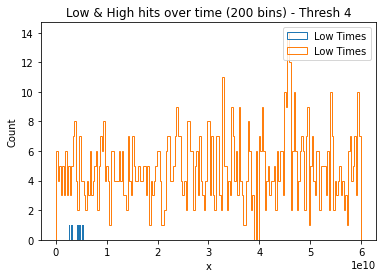

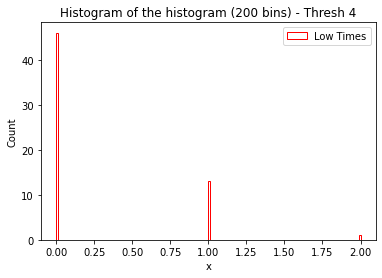

In [59]:
bns = 200
one_s_bins, *trash = np.histogram(lowTimes,bins=60)
#two_s_bins, *trash = np.histogram(highTimes,bins=60)

pp.hist(lowTimes, bins = bns, label = "Low Times", histtype = "step")
pp.hist(highTimes, bins = bns, label = "Low Times", histtype = "step")
pp.legend()
pp.xlabel('x')
pp.ylabel("Count")
pp.title("Low & High hits over time (" + str(bns)+" bins) - Thresh " + str(set_channel))
pp.show()
pp.close()

# Why are we taking a histogram of a histogram here, is it necessary (not for code)
pp.hist(one_s_bins, bins = bns, label = "Low Times", histtype = "step", color = col)
pp.legend()
pp.xlabel('x')
pp.ylabel("Count")
pp.title("Histogram of the histogram (" + str(bns)+" bins) - Thresh " + str(set_channel))
pp.show()

In [60]:
def getDiffs(tymes):
    diffs = []
    for _ in range(len(tymes) - 1):
        diffs.append(tymes[_+1] - tymes[_])
    return diffs

In [61]:
lowDiffs = getDiffs(lowTimes)
highDiffs = getDiffs(highTimes)
allDiffs = lowDiffs + highDiffs

In [62]:
display(len(lowDiffs))
display()
display(len(highTimes))

14

959

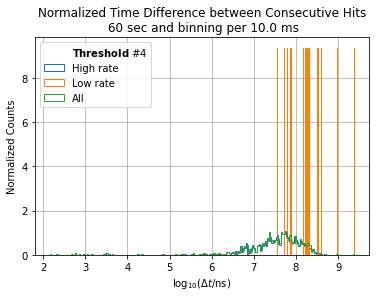

In [63]:
bns = 240
timeLength = int((endTime - startTime)*1e-9)
ax = pp.subplot(1,1,1)
ax.hist(np.log10(highDiffs), bins = bns, histtype = 'step', density = True, label = 'High rate')
ax.hist(np.log10(lowDiffs), bins = bns, histtype = 'step', density = True, label = 'Low rate')
ax.hist(np.log10(allDiffs), bins = bns, histtype = 'step', density = True, label = 'All')
ax.grid()
ax.set_axisbelow(True)
#ax.set_xlim(1,7)
#ax.set_ylim(-0.05,0.8)
lab = " #" + str(set_channel)
ax.plot([], [], ' ', label="$\\bf{Threshold}$" + lab)
ax.legend(loc = 'upper left')
ax.set_ylabel("Normalized Counts")
ax.set_xlabel(r"$\mathrm{log}_{10} \left(\Delta t/\mathrm{ns}\right)$")
ax.set_title("Normalized Time Difference between Consecutive Hits\n " + str(timeLength) + " sec and binning per " + str(binRate) + " ms")
pp.show()